# Problem Set 6

### Heather Chen

### 1. Multiple Linear Regression

In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix 
import matplotlib.pyplot as plt

#### a) 

In [2]:
df_quant = pd.read_csv("../PS6/data/Auto.csv", na_values='?')
df_quant.dropna(inplace=True)

In [3]:
df_quant.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


#### b) Produce a scatter plot

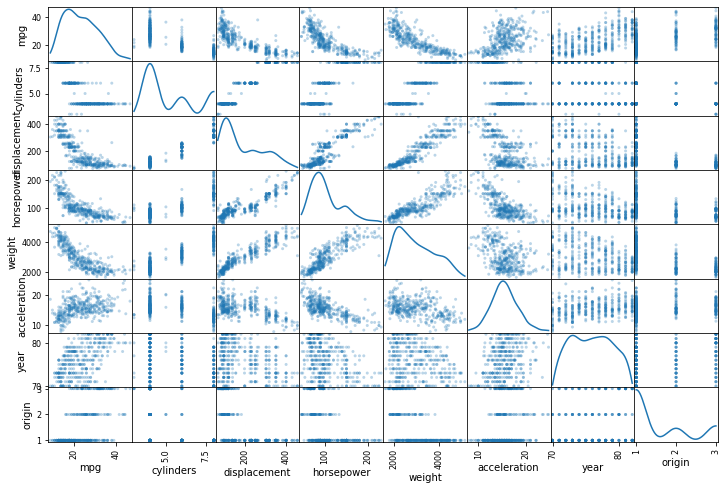

In [4]:
scatter_matrix(df_quant, alpha=0.3, figsize=(12, 8), diagonal='kde')
plt.show()

#### c) Correlation matrix

In [5]:
df_quant.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


#### d) Multiple Linear regression of mpg on other variables

In [6]:
import statsmodels.api as sm

df_quant['const'] = 1
reg1 = sm.OLS(endog=df_quant['mpg'], exog=df_quant[['const', 'cylinders', 'displacement', 'horsepower', 
            'weight', 'acceleration', 'year', 'origin']], missing='drop')
results = reg1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 18 Feb 2020   Prob (F-statistic):          2.04e-139
Time:                        23:18:07   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

(i) The coefficients before variables "displacement", "weight", "year", and "origin" are statistically significant at the 1% level. <br>
(ii) The coefficients before variables "cylinders", "horsepower", and "acceleration" are not satistically significant at the 10% level. <br>
(iii) Holding other variables constant, one year of increase in the vechicle's production year will lead to an increase of 0.7598 miles per gallon on average. The result is significant at 1% significant level. 

#### e) Non-linear relationship

Given the scatter plot above, "displacement", "horsepower", and "weight" are most likely to have a nonlinear relationship with mpg. 

In [7]:
#(i) New multiple regression including squared terms
df_quant['displ2'] = df_quant['displacement'] ** 2
df_quant['horse2'] = df_quant['horsepower'] ** 2
df_quant['wei2'] = df_quant['weight'] ** 2
df_quant['accer2'] = df_quant['acceleration'] ** 2

reg2 = reg1 = sm.OLS(endog=df_quant['mpg'], exog=df_quant[['const', 'cylinders', 'displacement', 'horsepower', 
            'weight', 'acceleration', 'year', 'origin', 'displ2', 'horse2', 'wei2', 'accer2'
                                                          ]], missing='drop')
results = reg2.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Tue, 18 Feb 2020   Prob (F-statistic):          1.75e-160
Time:                        23:18:07   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           20.1084      6.696      3.003   

(ii) The adjusted R value in this new model is 0.866, which is higher than the statistic in the original model (which is 0.818).  <br>
(iii) The coefficient before "displacement" has turned from positive to negative, also it became insignificant even at 10% level. The coefficient before the squared term of displacement is a little greater than 0, and is also insignificant. <br>
(iv) The statistical significane of "cylinders" is still insignificant, and it is even less significant than the original model. 

#### f) Prediction

In [8]:
results.predict(exog = [1, 6, 200, 100, 3100, 15.1, 99, 1, 200**2, 100**2, 3100**2, 15.1**2])[0]

38.73211109753366

### 2. Classification Problem

#### a) Euclidean distance

In [9]:
dic = {'X1': [0, 2, 0, 0, -1, 1], 'X2': [3, 0, 1, 1, 0, 1], 'X3': [0, 0, 3, 2, 1, 1], 
       'Y': ['Red', 'Red', 'Red', 'Green', 'Green', 'Red']}
df_knn = pd.DataFrame(dic)
df_knn

,X1,X2,X3,Y
0,0,3,0,Red
1,2,0,0,Red
2,0,1,3,Red
3,0,1,2,Green
4,-1,0,1,Green
5,1,1,1,Red


In [10]:
df_knn['distance'] = (df_knn['X1']**2 + df_knn['X2']**2 + df_knn['X3']**2)**(0.5)
df_knn.index += 1
df_knn

,X1,X2,X3,Y,distance
1,0,3,0,Red,3.000000
2,2,0,0,Red,2.000000
3,0,1,3,Red,3.162278
4,0,1,2,Green,2.236068
5,-1,0,1,Green,1.414214
6,1,1,1,Red,1.732051


The Euclidean distance between each observation and test points are 3, 2, $\sqrt{10}$, $\sqrt{5}$, $\sqrt{2}$, and $\sqrt{3}$.

#### b) KNN prediction with K = 1

When K=1, the nearest neighbor is the 5th observation, hence the KNN prediction is Red.

#### c) KNN prediction with K = 3

When K=3, the nearest neighbor can be the 2nd, the 5th, or the 6th observation. Since two of the three outcomes are Red, hence the KNN prediction when K=3 is Red. 

#### d) Bayes optimal decision boundary

If the decision boundary is highly non-linear, then it indicated that the model has low bias and high variance, thus a small K would obtain better approximation. 

#### e) KNN classifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=2, weights='distance')
X = [[0,3,0], [2,0,0], [0,1,3], [0,1,2], [-1,0,1], [1,1,1]]
y = ['Red', 'Red', 'Red', 'Green', 'Green', 'Red']
neigh.fit(X, y)

print("The KNN classifier of the test point is:", neigh.predict([[1,1,1]])[0])

The KNN classifier of the test point is: Red


### 3. Multivariate logistic regression

#### a) Logistic regression

In [12]:
df_quant['mpg_high']=np.where(df_quant['mpg']>=np.median(df_quant['mpg']),1,0)

In [13]:
reg3 = sm.Logit(endog=df_quant['mpg_high'], exog=df_quant[['const', 'cylinders', 'displacement', 'horsepower', 
            'weight', 'acceleration', 'year', 'origin']], missing='drop')
results_3 = reg3.fit()
print(results_3.summary())

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               mpg_high   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Tue, 18 Feb 2020   Pseudo R-squ.:                  0.7101
Time:                        23:18:08   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
Covariance Type:            nonrobust   LLR p-value:                 2.531e-79
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.1549      5.764     -2.976      0.003     -28.452      -5.858
cylinders       -0.1626

The regressors that have coefficients that are statistically significant at the 5% level are weight and year. 

#### b) Divide training and testing sets

In [18]:
from sklearn.model_selection import train_test_split

X = df_quant[['const', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
y = df_quant['mpg_high']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=10)

#### c) Estimate logistic regression

In [19]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression().fit(X_train, y_train)
coeff=pd.concat([pd.DataFrame(X.columns,columns=["Name"]),
                 pd.DataFrame(np.transpose(log.coef_),columns=["Value"])],axis = 1)
coeff

/Users/heatherchen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,Name,Value
0,const,-0.068205
1,cylinders,-0.654085
2,displacement,0.005572
3,horsepower,-0.039046
4,weight,-0.004993
5,acceleration,-0.143490
6,year,0.300195
7,origin,-0.149389


#### d) Predicted value and confusion matrix

In [20]:
#Predicted values are
mph_pred = log.predict(X_test)
mph_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0])

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, mph_pred)
confusion_matrix

array([[86, 13],
       [12, 85]])

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, mph_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87        99
           1       0.87      0.88      0.87        97

    accuracy                           0.87       196
   macro avg       0.87      0.87      0.87       196
weighted avg       0.87      0.87      0.87       196



Generally speaking, the test predicts low mpg and high mpg equally well. 